<img src="http://drive.google.com/uc?export=view&id=1JzM1Jig5KAOCvU4tIf2t66B3gd1uy1rG" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

## <font color='blue'> DBMS Implementation </font>

### <font color='blue'> Introduction </font> 
* Schema details
* ER diagram      
* Homework
* Required installation
</font>

### <font color='blue'> MySQL with Python
* Connect to DB
* CRUD - operation
    * Create (Insert)
    * Read (SELECT)
    * Update
    * Delete
</font>

### <font color='blue'> Source Code </font>

### <font color='blue'> Introduction </font> 

In this session we will be working on a small project. While working on this project we will cover the following items
1. Create a new database and define tables and relation among the tables
2. Use ```mysql-connector-python``` to connect to a DB and perform the CRUD operations
3. Learn about the functionality of ```mysql-connector-python``` 


### <font color='blue'> Project </font>

#### <font color='blue'> Schema Details</font>

In this project we are managing users of an application. It also manages various electronic gadgets and allows registered users to place order of these gadgets.

These tables are

***User*** - Maintains details of users of an application. Only a registered user is allowed to place an order.

***Order***  - This table maintains a list of orders placed by users. While ordering a user can order more than one product in a single order. It contains the overall summary of an order placed

***Orderitem***  - This table maintains a list of all the items that have been ordered against each order. Each row maintains the details as which gadget, its price and quantity ordered. 

***Product*** - This table maintains the list of all the products that are sold. 

***ProductDetails***  - this table maintains more details of each product 

***Inventory*** - this table maintains the inventory of each product 

#### <font color='blue'> ER diagram </font>  
This diagram explains how these tables are related with each other.

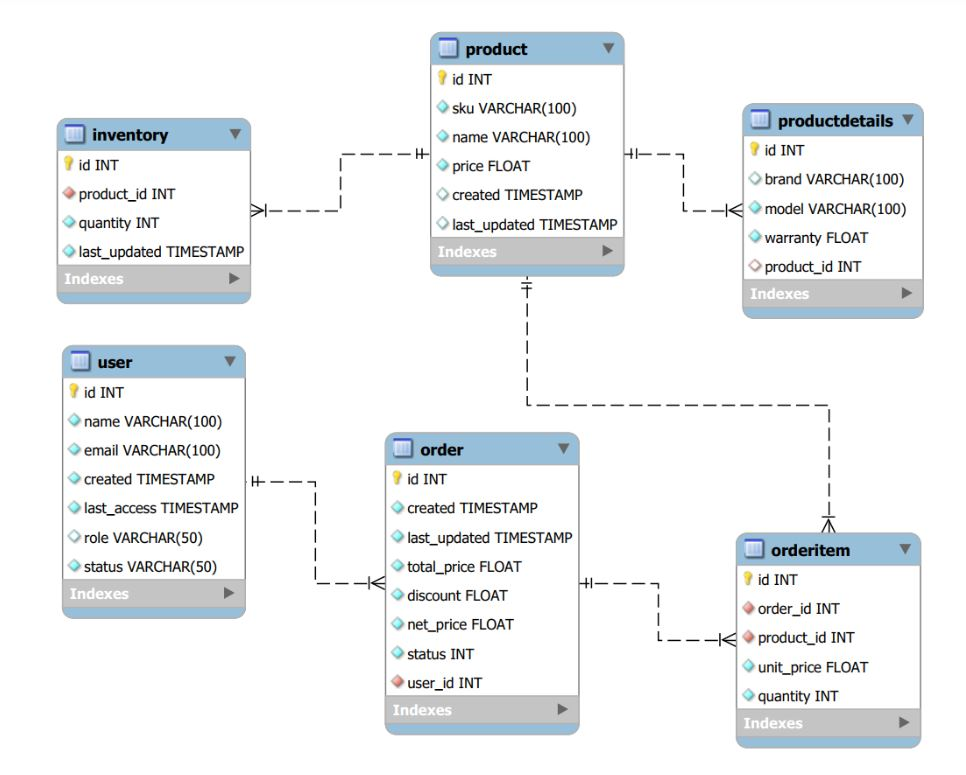

#### <font color='blue'> Homework </font>

Based on the above information you have to do the following... 
1. Open and run the file ```create_and_populate_db.sql``` in MySQL Workbench   

<div class="alert alert-block alert-info">
    Assuming user has installed MySQLWorkbench application before running the .sql file
</div>

After successfully executing the .sql file in MySQL Workbench, this will create a DB ```productorder``` with the required tables and sample data. We will use this to implement the CRUD operation

#### <font color='blue'> Required installation </font>

Also ensure that you have installed the package ```mysql-connector-python``` as well.  
Python, in itself provides no libraries to connect with DB(s). So in order to connect with MySQL server, you have to install this package on the machine where you will write the code for CRUD operations. 

Step 1. Before the installation of mysql-connector-python

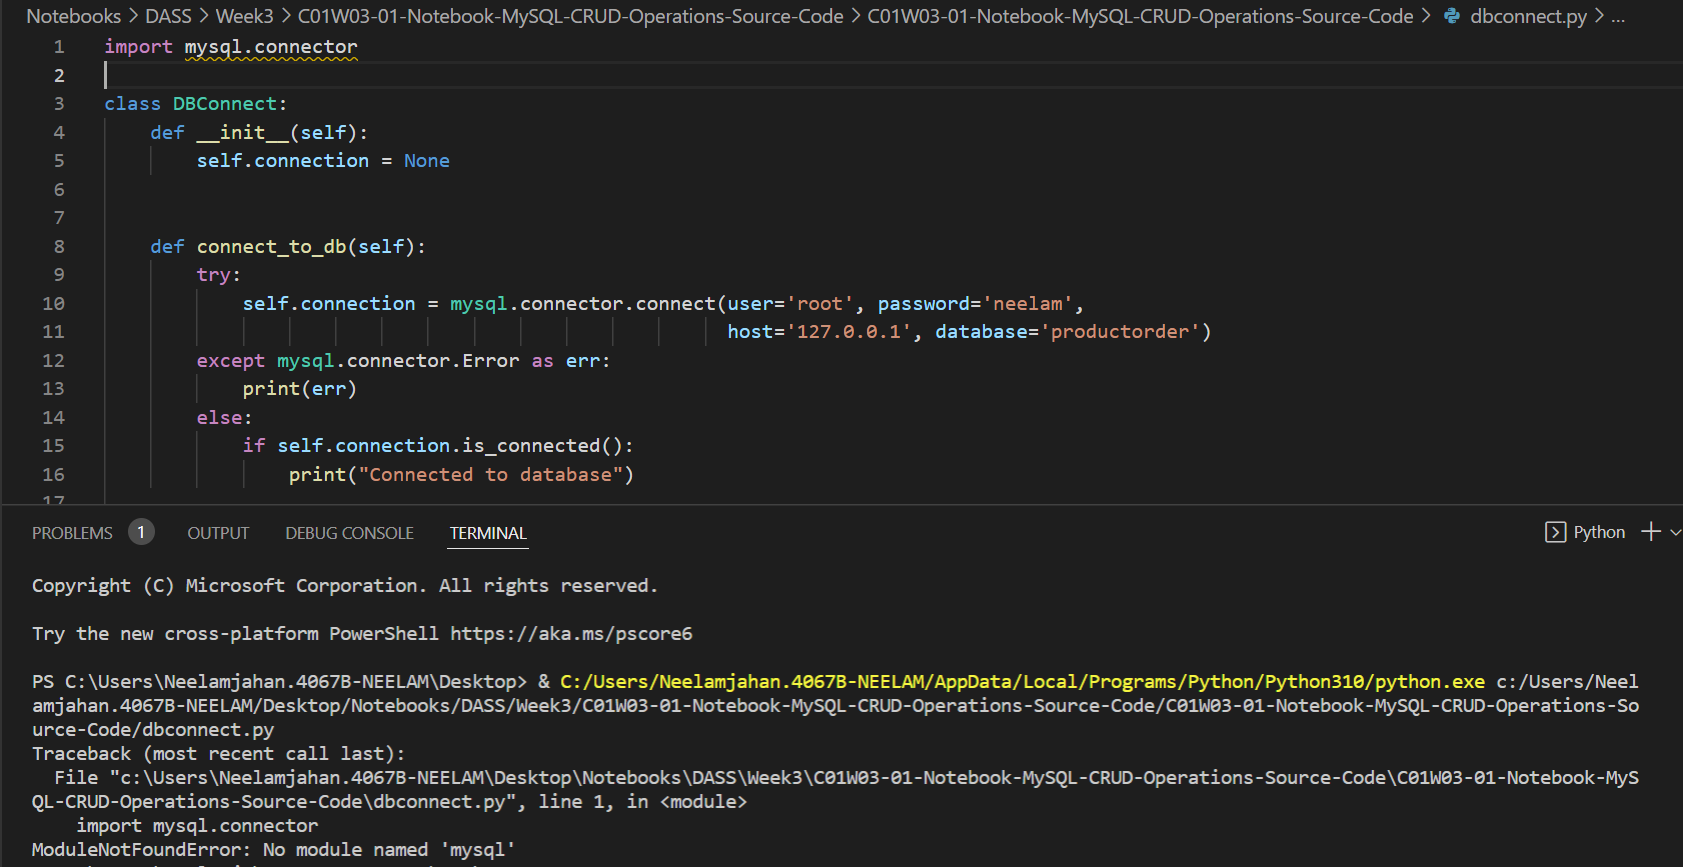

Step-2. Command to install the library using pip command. 

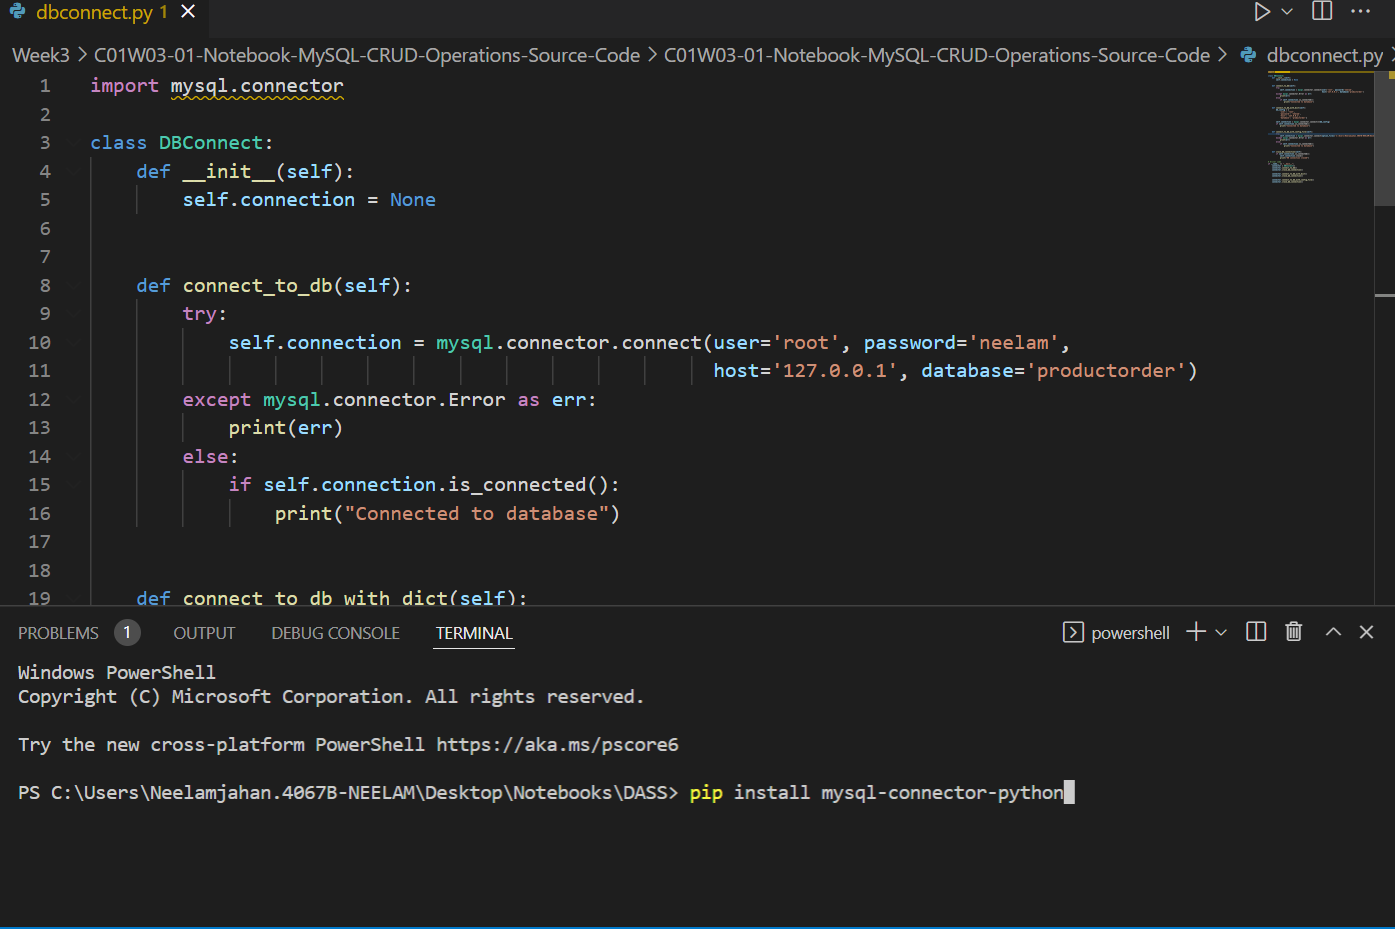

Step-3: Once the library is correctly installed. 

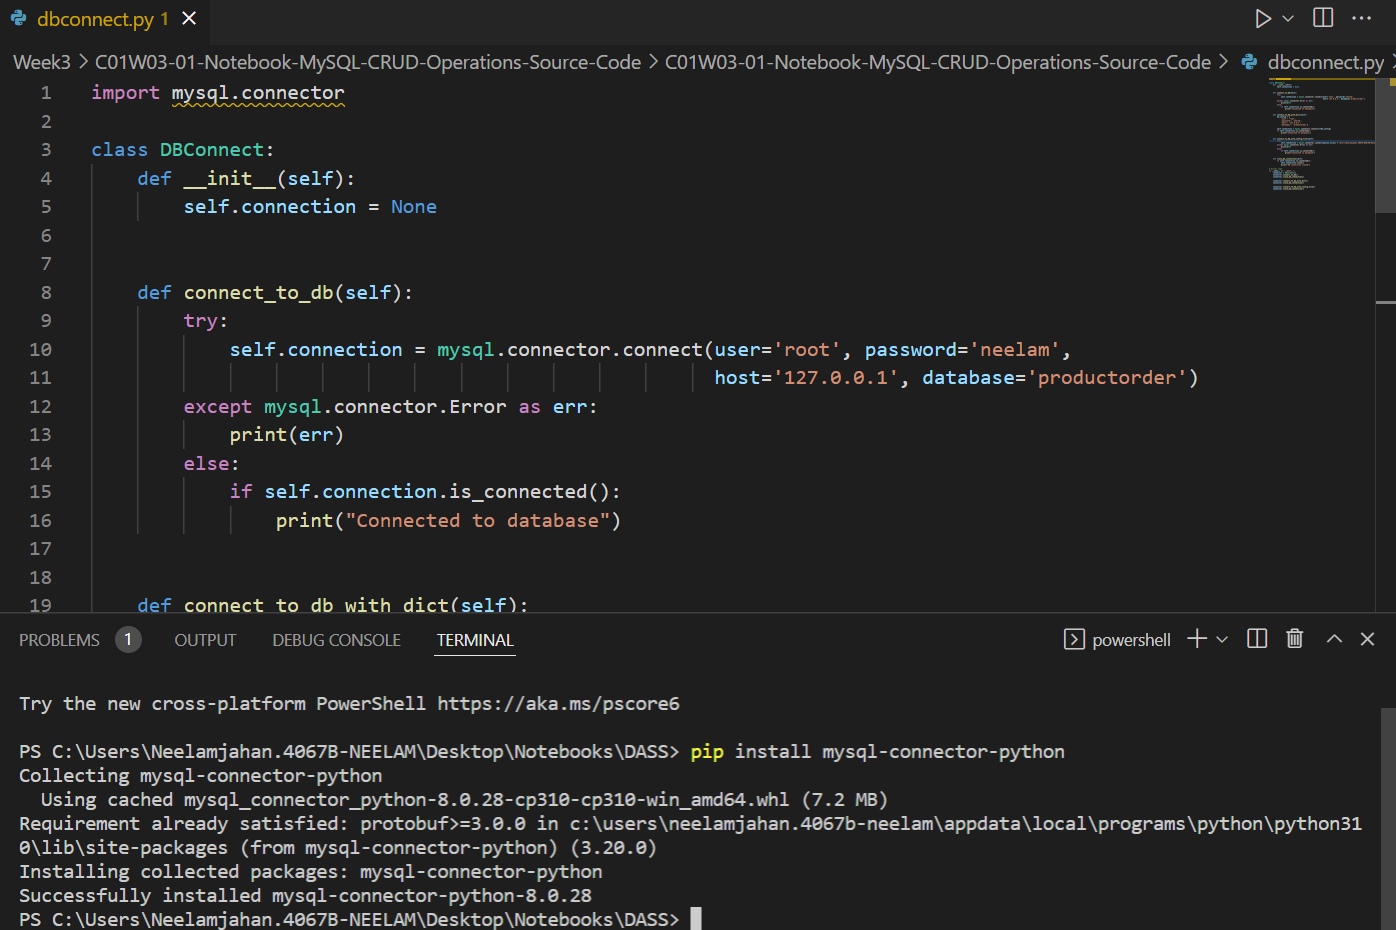


### <font color='blue'> MySQL with Python</font>

Now we will see as how we can connect with the database and do CRUD operation

#### <font color='blue'> Connect to DB </font>

When it comes to connecting to DB, we can do this in different ways.  
We are using ```mysql-connector-python``` for this and I also believe that you have installed the same on your PC as well.  
With Python we do not get any default DB driver/connector to connect with a database. This is the reason we need the ```mysql-connector-python``` module.  

MySQL Connectort/Python is a package that enables a Python program to interact with a MySQL database.  

In [ ]:
import mysql.connector

class DBConnect:
    def __init__(self):
        self.connection = None

    def connect_to_db(self):
        try:
            self.connection = mysql.connector.connect(user='root', password='MyNewPass',
                                                      host='127.0.0.1', database='productorder')
        except mysql.connector.Error as err:
            print(err)
        else:
            if self.connection.is_connected():
                print("Connected to database")

                
    def close_db_connection(self):
        if self.connection.is_connected():
            self.connection.close()
            print("DB connection closed")

First statement is we import ```mysql.connector```.  
We create a class ***DBConnect***.  
Use the method ***mysql.connector.connect()*** to connect to DB.  
On successful connection it returns an object of  ***MyConnection()*** class.  
In case of failure this function raises an exception ***mysql.connector.Error***   

Following is an explanation of the parameters we pass to this function...   
***user*** - user who has access to this database,   
***password*** - password of the user  
***database*** - schema to connect to  
***host*** - IP address MySQL server on which the DB is hosted.   

<div class="alert alert-block alert-info">
    For more details refer - <a href="https://dev.mysql.com/doc/connector-python/en/connector-python-connectargs.html">Connection Parameters </a>
</div>

While connecting with DB, consider the following points... 
1. While connecting to a DB, always ensure that the program is written to manage the exceptions while connecting to a DB  
2. Always, always close an open connection once you are done with the database operations  
3. Never hard-code the DB details and login credentials in the program. The above code is for demonstration

***MyConnection*** object provides the functionality to connect with a database and do various operations. Following is a list of few important functions of this class.  

> ***.close()***  
> Closes the connection with a database.  

> ***.commit()***  
> This method sends a COMMIT statement to the MySQL server, committing the current transaction. Since by default Connector/Python does not auto-commit, it is important to call this method after every transaction that modifies data for tables. 

> ***.rollback()***  
> This method sends a ROLLBACK statement to the MySQL server, undoing all data changes from the current transaction.  

> ***.cursor()***  
> Return a new Cursor Object using the connection. This is used to do operations on MySQL server  


<font size=1 >Refer MySQL Connector documentation for more details - https://dev.mysql.com/doc/connector-python/en/connector-python-api-mysqlconnection.html </font>

Connecting to DB using a dictionary

In [ ]:
class DBConnect:
    # . . .
    def connect_to_db_with_dict(self):
        db_config = {
            'user': 'root',
            'password': 'MyNewPass',
            'host': '127.0.0.1',
            'database': 'productorder'}
        
        self.connection = mysql.connector.connect(**db_config)
        if self.connection.is_connected():
            print("Connected to database")

In the above function the only difference is that we are using a dictionary to pass on the required parameters.  
The ***key(s)*** of this dictionary are same as the parameter names of the function ***mysql.connector.connect.connect()*** accepts.  
Rest all is same as above.

Connecting to DB by passing a configuration file to ```connect()```

In [ ]:
class DBConnector:
    # . . .
    def connect_to_db_with_config_file(self):
        try:
            self.connection = mysql.connector.connect(option_files='my_conf.txt', option_groups=['connection_details'])
        except mysql.connector.Error as err:
            print(err)
        else:
            if self.connection.is_connected():
                print("Connected to database")

Following is the content of file ```my_conf.txt```

In [ ]:
[connection_details]
host = 127.0.0.1
database = productorder
user = root
password = MyNewPass
port  = 3306

SyntaxError: invalid syntax (1075368934.py, line 2)

In this case, the database details are stored in a file. We pass two pieces of information to the ```connect()``` first,is the file that contains the DB and login information, second is the group heading under which the details are mentioned.  
*We can mention more than one groups in a file and connect to a relevant DB by mentioning a correct option_group*. 

Following is the complete code of connecting to DB file ```dbconnect.py```

In [ ]:
import mysql.connector

class DBConnect:
    def __init__(self):
        self.connection = None

        
    def connect_to_db(self):
        try:
            self.connection = mysql.connector.connect(user='root', password='MyNewPasss',
                                                      host='127.0.0.1', database='productorder')
        except mysql.connector.Error as err:
            print(err)
        else:
            if self.connection.is_connected():
                print("Connected to database")

                
    def connect_to_db_with_dict(self):
        db_config = {
            'user': 'root',
            'password': 'MyNewPass',
            'host': '127.0.0.1',
            'database': 'productorder'}
        
        self.connection = mysql.connector.connect(**db_config)
        if self.connection.is_connected():
            print("Connected to database")            
         
 
    def connect_to_db_with_config_file(self):
        try:
            self.connection = mysql.connector.connect(option_files='my_conf.txt', option_groups=['connection_details'])
        except mysql.connector.Error as err:
            print(err)
        else:
            if self.connection.is_connected():
                print("Connected to database")

                
    def close_db_connection(self):
        if self.connection.is_connected():
            self.connection.close()
            print("DB connection closed")
            
# Driver code            
if __name__ == "__main__":
    connector = DBConnect()
    connector.connect_to_db()
    connector.close_db_connection()

    connector.connect_to_db_with_dict()
    connector.close_db_connection()

    connector.connect_to_db_with_config_file()
    connector.close_db_connection()

#### <font color='blue'> CRUD operation </font>

Once we have the connection available, we will now focus on the operations on DB.  
For this we will create a new file ```CRUD_operations.py```. This CRUD functions in this file will use the DBConnect class to connect with the DB.  

##### <font color='blue'> CREATE (Insert statement) </font>

In [ ]:
from dbconnect import DBConnect


def insert_in_table(db_connection, statement, params):
    if not statement:
        return None
    cursor = db_connection.connection.cursor(prepared=True)
    cursor.execute(statement, params)
    db_connection.connection.commit()
    cursor.close()


def insert_new_row(db_connection):

    insert_statement = """INSERT INTO ProductOrder.Product (sku, name, price, created, last_updated) 
    values (%s, %s, %s, %s, %s)"""

    values = ('GGL-10003', 'GoogleTV-03', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54')
    
    insert_statement1 = """INSERT INTO `ProductOrder`.`Order`(`created`, `last_updated`, `total_price`, `discount`, 
    `net_price`, `status`, `user_id`) values (%s, %s, %s, %s, %s, %s, %s)"""
    
    values1 = ('2021-12-06 23:12:09', '2021-12-07 20:30:01', 100000, 10000, 90000, 1, 3)    
    
    insert_in_table(db_connection, insert_statement, values)


if __name__ == "__main__":
    db_connection = DBConnect()
    db_connection.connect_to_db()
    insert_new_row(db_connection)

    db_connection.close_db_connection()   

Let's understand the code above  

Function ***insert_new_device()***  
In this function insert statement is written with placeholder for values (called parameters). These values are passed on separately in the form of a tuple.   
***Note***: The placeholders are marked as **%s**, irrespective of the type of a value passed. Just ensure that the count of placeholders and values passed must match.  
Such statements are known as ***prepared statements***.

<div class="alert alert-block alert-info">
    A database, before executing any query, parses it for any errors, optimizes the query to execute as fast as possible. All this information is compiled and stored in DB as a template. Once all is done successfully, a query executes.<br>
    Any subsequent call to the same query will use the existing template and skip the preprocessing and use the existing template to run a query. <br>
    Do note two insert statements with separate value(s) are considered as two separate statements.
</div>

<div class="alert alert-block alert-info">
    <b><i>Prepared statement</i></b>: When an SQL statement is written with parameters, the database parses, compiles and optimizes a query and store as a template. <br> 
    When this statement is executed with different set of data (parameter values), the database simply replaces the data values and uses the same template. <br>
    This brings efficiency in the execution process
</div>

Function ***insert_in_table()***  
In this function we create a cursor and use this cursor object to execute queries on a database.  
First step is of creating a cursor using the connection object. And while creating a cursor we tell that this cursor will enable the execution of prepared statement.  
The cursor object then uses the ```execute()``` function to send a query for execution on the server with the SQL statement and required data

***Note:*** - the ***commit()*** is called at the connection level and not at the cursor level.  
Finally we close the cursor with ```close()```

***Cursors***  
As mentioned earlier, cursor objects (class MySQLCurosr) are used to execute query on a database and it uses the connection object to do these operations. 

A few of the important cursor functions are... 

> ***.close()***  
> Close the cursor and ensures that that this cursor object has no reference to original connection object.  


> ***.execute(operation, params=None)***  
> Prepare and execute a database operation (query or command).  
> Parameters may be provided as sequence or mapping and will be bound to variables in the operation.   
> While executing an insert statement it converts Python data type to MySQL data type.


> ***.executemany( operation, seq_of_parameters )***  
Prepare a database operation (query or command) and then execute it against all parameter sequences or mappings found in the sequence seq_of_parameters.  

<font size=1 >For more details refer to documentation. https://dev.mysql.com/doc/connector-python/en/connector-python-api-mysqlcursor.html</font> 

***Types of Cursors***  
```mysql-connector-python``` provides specialized cursors as well. All of these are derived from class MySQLCursor. Following is a description of a few.  

> ***MySQLCursorBuffered class*** - calling statement - ```db_connection.connection.cursor(buffered=True)```  
> This cursor, after executing a query, fetches the data as well and buffers the rows. 
> Fetching of data happens through this buffer
> It is useful when we have small data set.  

> ***MySQLCursorRaw*** - calling statement - ```db_connection.connection.cursor(raw=True)```  
> This cursor does not do any data type conversion from MySQL to Python. Hence better at performance.   
> This is used when a user wants to do the conversion of data type himself/herself  
> *Note:* - when data is passed between Python and MySQL the conversion of data happens implicitly

> ***MySQLCursorBufferedRaw*** - calling statement - ```db_connection.connection.cursor(raw=True, buffered=True)```  
> This cursor is raw and the data is buffered when a query executes

> ***MySQLCursorDict*** - calling statement - ```db_connection.connection.cursor(dictionary=True)```  
> In this cursor each row is represented in the form of a dictionary. Column names are the keys and data of a row are values

<font size=1 >For more details refer to documentation. https://dev.mysql.com/doc/connector-python/en/connector-python-api-mysqlcursor.html</font> 

In [ ]:
def insert_many_rows_in_table(db_connection):

    insert_statement = """INSERT INTO ProductOrder.Product (sku, name, price, created, last_updated) 
    values (%s, %s, %s, %s, %s)"""

    values = (('GGL-10004', 'GoogleTV-04', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54'),
              ('GGL-10005', 'GoogleTV-05', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54'),
              ('GGL-10006', 'GoogleTV-06', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54'))

    cursor = db_connection.connection.cursor(prepared=True)
    cursor.executemany(insert_statement, values)
    db_connection.connection.commit()
    cursor.close()
    
db_connection = DBConnect()
db_connection.connect_to_db()
insert_many_rows_in_table(db_connection)
db_connection.close_db_connection()

#### <font color='blue'> READ (SELECT) </font>

In [ ]:
def select_data(db_connection):
    query_statement = """SELECT * FROM ProductOrder.Product WHERE id > 0"""

    query_statement1 = """SELECT u.name FROM user u JOIN ProductOrder.Order o ON u.id = o.user_id
    JOIN ProductOrder.OrderItem oi ON o.id = oi.order_id
    JOIN ProductOrder.Product p ON oi.product_id = p.id
    JOIN ProductOrder.ProductDetails pd ON p.id = pd.product_id
    WHERE pd.brand = 'Sony' AND 
    pd.model = 'Bravia-X'"""    
    
    cursor = db_connection.connection.cursor(dictionary=True)
    #cursor = db_connection.connection.cursor(buffered=True, dictionary=True)
    cursor.execute(query_statement)
    # cursor.execute(query_statement1)

    print("rowcount (initial):", cursor.rowcount, end='\n\n')
    print("column_names:", cursor.column_names, end='\n\n')
    print("with_rows:", cursor.with_rows, end='\n\n')
    print("description: ", end="")
    print(cursor.description)
    print("\nstatement:", cursor.statement, end='\n\n')
    print("lastrowid:", cursor.lastrowid, end='\n\n')
    print("rowcount (final):", cursor.rowcount, end='\n\n')
    print(cursor.fetchone())
    print("rowcount (final):", cursor.rowcount, end='\n\n')
    print(cursor.fetchmany(3))
    print("rowcount (final):", cursor.rowcount, end='\n\n')

    for row in cursor:
        print(row)
        
db_connection = DBConnect()
db_connection.connect_to_db()
select_data(db_connection)
db_connection.close_db_connection()

In the above code we create a cursor and use this cursor object to execute a select query.  

<div class="alert alert-block alert-warning">
<b><i>Note</i></b> - if we have huge amount of data, then pulling all the data can be taxing on system performance.  
</div>

Once we have executed the select query, we can use the following functions to fetch row(s)
> ***fetchone()*** - This function fetches the next row from the result set. When all the rows are fetched, it returns None. When it fetches the data from MySQL server, it also does the conversion of data types from MySQL to Python implicitly.

> ***fetchmany(size=1)*** - by default this function works like fetchone(). When size is mentioned, it fetches the specified number of rows. When the size is more than the available rows in result set, then it returns lesser number of rows

> ***fetchall()*** - this function all the available rows in the result set

*For the above 3 function, all the functions return None when all the result set is fetched or when it is empty.  
It is MUST to fetch all the rows of a current query if we wish to use the same connection for next query*.  

Some of the attributes of a cursor are... 
> ***.with_rows*** - This property is set to True when the last executed query produces data. This can be used to check if cursor has any data before fetching a row.  

> ***.rowcount*** - has the number of rows returned from a SELECT query or number of rows affected by an INSERT or UPDATE statement. For SELECT this contains value when the cursor is buffered. Otherwise -1. When the rows are fetched this value increments  

<font size=1 >Refer documentation for more details. https://dev.mysql.com/doc/connector-python/en/connector-python-api-mysqlcursor.html</font>

#### <font color='blue'> UPDATE </font>

In [ ]:
def update_record(db_connection):
    update_statement = """Update ProductOrder.Product set price = %s WHERE id = %s"""
    values = (18000, 15)

    cursor = db_connection.connection.cursor(prepared=True)
    cursor.execute(update_statement, values)
    db_connection.connection.commit()
    cursor.close()
    

db_connection = DBConnect()
db_connection.connect_to_db()
update_record(db_connection)
db_connection.close_db_connection()

#### <font color='blue'> DELETE </font>

In [ ]:
def delete_records(self):
    delete_statement = """DELETE FROM ProductOrder.Product WHERE id = %s"""

    cursor = db_connection.connection.cursor(prepared=True)
    result = cursor.execute(delete_statement, (15,))
    db_connection.connection.commit()
    cursor.close()
    
db_connection = DBConnect()
db_connection.connect_to_db()
delete_records(db_connection)
db_connection.close_db_connection()

CRUD operations file ```crud_operations.py```

In [ ]:
from dbconnect import DBConnect


def insert_in_table(db_connection, statement, params):
    if not statement:
        return None
    cursor = db_connection.connection.cursor(prepared=True)
    cursor.execute(statement, params)
    db_connection.connection.commit()
    cursor.close()

def insert_new_row(db_connection):
    insert_statement = """INSERT INTO ProductOrder.Product (sku, name, price, created, last_updated) 
    values (%s, %s, %s, %s, %s)"""

    values = ('GGL-10003', 'GoogleTV-03', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54')
    
    insert_statement1 = """INSERT INTO `ProductOrder`.`Order`(`created`, `last_updated`, `total_price`, `discount`, 
    `net_price`, `status`, `user_id`) values (%s, %s, %s, %s, %s, %s, %s)"""
    
    values1 = ('2021-12-06 23:12:09', '2021-12-07 20:30:01', 100000, 10000, 90000, 1, 3)        
    
    insert_in_table(db_connection, insert_statement, values)


    
def insert_many_rows_in_table(db_connection):

    insert_statement = """INSERT INTO ProductOrder.Product (sku, name, price, created, last_updated) 
    values (%s, %s, %s, %s, %s)"""

    values = (('GGL-10004', 'GoogleTV-04', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54'),
              ('GGL-10005', 'GoogleTV-05', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54'),
              ('GGL-10006', 'GoogleTV-06', 150000, '2021-10-01 20:00:54', '2021-10-01 20:00:54'))

    cursor = db_connection.connection.cursor(prepared=True)
    cursor.executemany(insert_statement, values)
    db_connection.connection.commit()
    cursor.close()
    

def update_record(db_connection):
    update_statement = """Update ProductOrder.Product set price = %s WHERE id = %s"""
    values = (18000, 15)

    cursor = db_connection.connection.cursor(prepared=True)
    cursor.execute(update_statement, values)
    db_connection.connection.commit()
    cursor.close()    

    
def delete_records(self):
    delete_statement = """DELETE FROM ProductOrder.Product WHERE id = %s"""

    cursor = db_connection.connection.cursor(prepared=True)
    result = cursor.execute(delete_statement, (15,))
    db_connection.connection.commit()
    cursor.close()


def select_data(db_connection):
    query_statement = """SELECT * FROM ProductOrder.Product WHERE id > 0"""
    
    query_statement1 = """SELECT u.name FROM user u JOIN ProductOrder.Order o ON u.id = o.user_id
    JOIN ProductOrder.OrderItem oi ON o.id = oi.order_id
    JOIN ProductOrder.Product p ON oi.product_id = p.id
    JOIN ProductOrder.ProductDetails pd ON p.id = pd.product_id
    WHERE pd.brand = 'Sony' AND 
    pd.model = 'Bravia-X'"""        

    cursor = db_connection.connection.cursor(dictionary=True)
    cursor.execute(query_statement)
    # cursor.execute(query_statement1)

    print("rowcount (initial):", cursor.rowcount, end='\n\n')
    print("column_names:", cursor.column_names, end='\n\n')
    print("with_rows:", cursor.with_rows, end='\n\n')
    print("description: ", end="")
    print(cursor.description)
    print("\nstatement:", cursor.statement, end='\n\n')
    print("lastrowid:", cursor.lastrowid, end='\n\n')
    print("rowcount (final):", cursor.rowcount, end='\n\n')
    print(cursor.fetchone())
    print("rowcount (final):", cursor.rowcount, end='\n\n')
    print(cursor.fetchmany(3))
    print("rowcount (final):", cursor.rowcount, end='\n\n')

    for row in cursor:
        print(row)
    
if __name__ == "__main__":
    db_connection = DBConnect()
    db_connection.connect_to_db()
    
    # insert_new_row(db_connection)
    # insert_many_rows_in_table(db_connection)
    # update_record(db_connection)
    # delete_records(db_connection)
    # select_data(db_connection)

    db_connection.close_db_connection() 